<h3>Load the DataSet</h3>
<ul>
    <li>Load Train DataSet</li>
    <li>Get Random Sample of Size 50 for Validation DataSet</li>
    <li>Seprate Validation DataSet Labels and Fields</li>
    <li>Load Test DataSet</li>
    <li>Load Test DataSet labels</li>
</ul>

In [1]:
import pandas as pd

# Defining Train & Test Data Path
file_path_train = 'train.csv'
file_path_test = 'test.csv'
file_path_pred = 'preds.csv'

# Opens all the three files 
df_train = pd.read_csv(file_path_train)
# Seprate Train Data Set Labels
x_train = df_train.iloc[:, :2]
x_label = df_train.iloc[:, -1].astype(int)
# Load Test DataSet Fields
df_test = pd.read_csv(file_path_test)
# Load Test DataSet Labels
df_pred = pd.read_csv(file_path_pred).astype(int)

<h3>Train DataSet before Normalizing</h3>

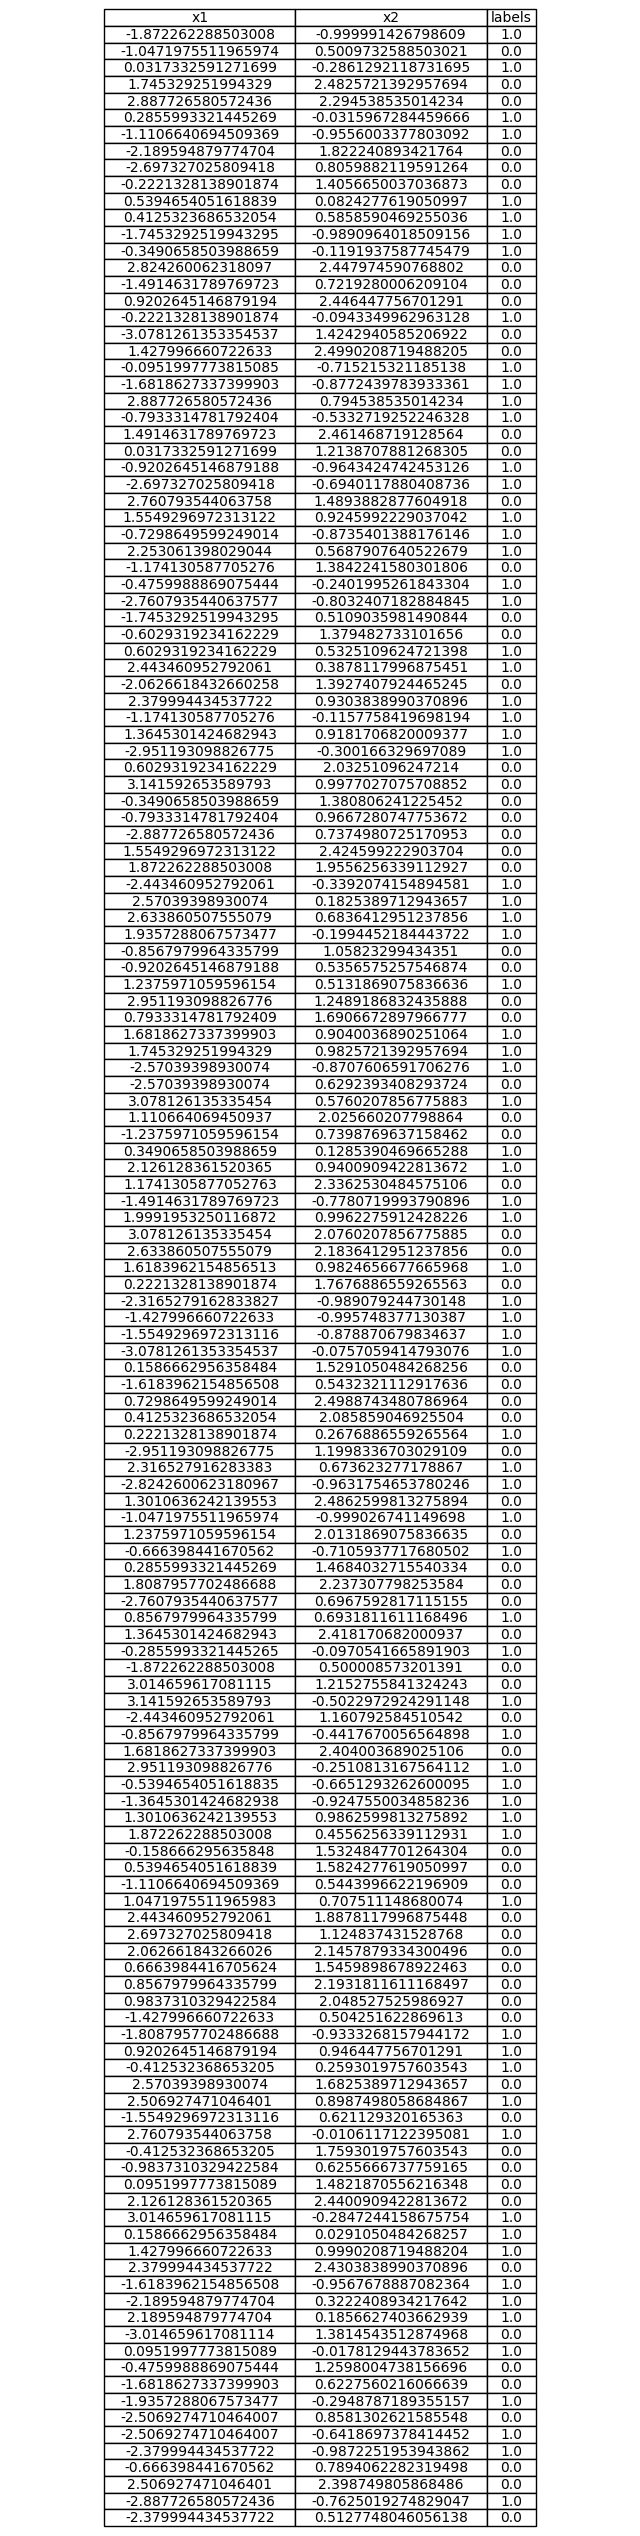

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))  
ax.axis('off')

# Create a table with labels 
table = ax.table(cellText=df_train.values, colLabels=df_train.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([i for i in range(len(df_train.columns))])

plt.show()

<h3>Test DataSet before Normalizing</h3>

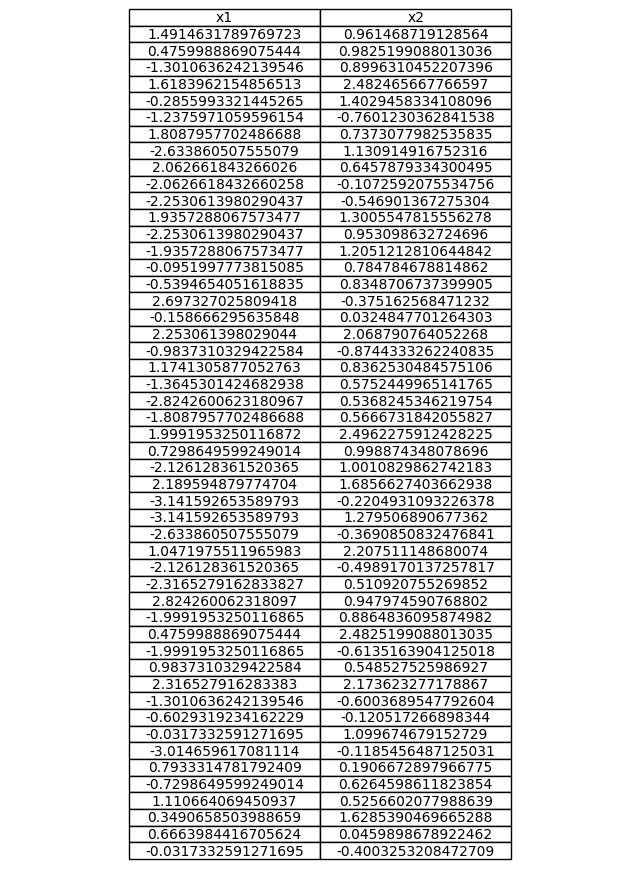

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))  
ax.axis('off')

# Create a table with labels 
table = ax.table(cellText=df_test.values, colLabels=df_test.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([i for i in range(len(df_test.columns))])

plt.show()

<h3>Test DataSet Labels (Prediction)</h3>

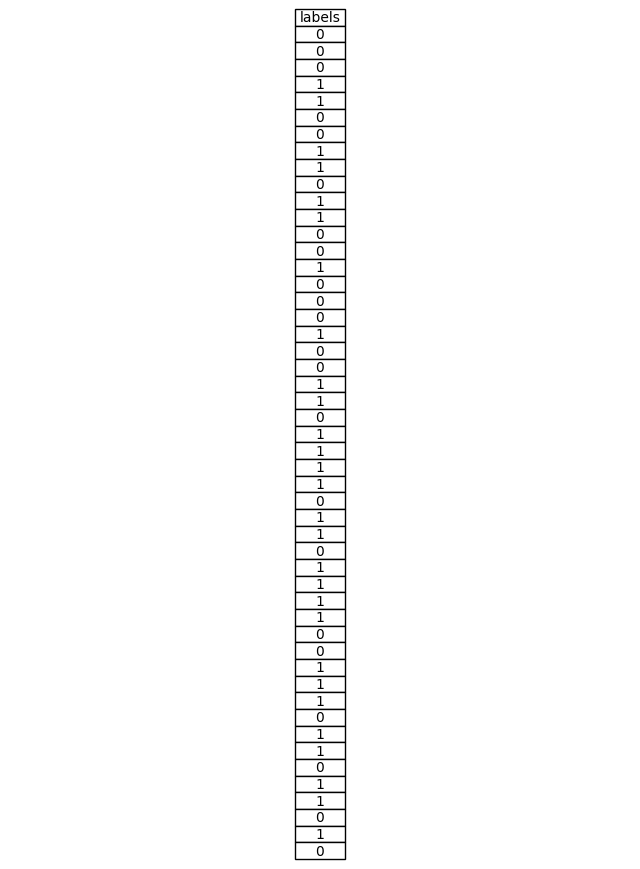

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))  
ax.axis('off')

# Create a table with labels using the table method
table = ax.table(cellText=df_pred.values, colLabels=df_pred.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([i for i in range(len(df_pred.columns))])

plt.show()

<h3>Normalize DataSet</h3>
<ul>
    <li>Normalize Train Set (validation Set is inside it)</li>
    <li>Normalize Test Set</li>
</ul>

In [5]:
from sklearn.preprocessing import StandardScaler

# Transfer Data to the space with mean of 0 and variance of 1
scaler = StandardScaler()
df_train_standardized = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
df_test_standardized = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

<h3>Train DataSet after Normalizing</h3>

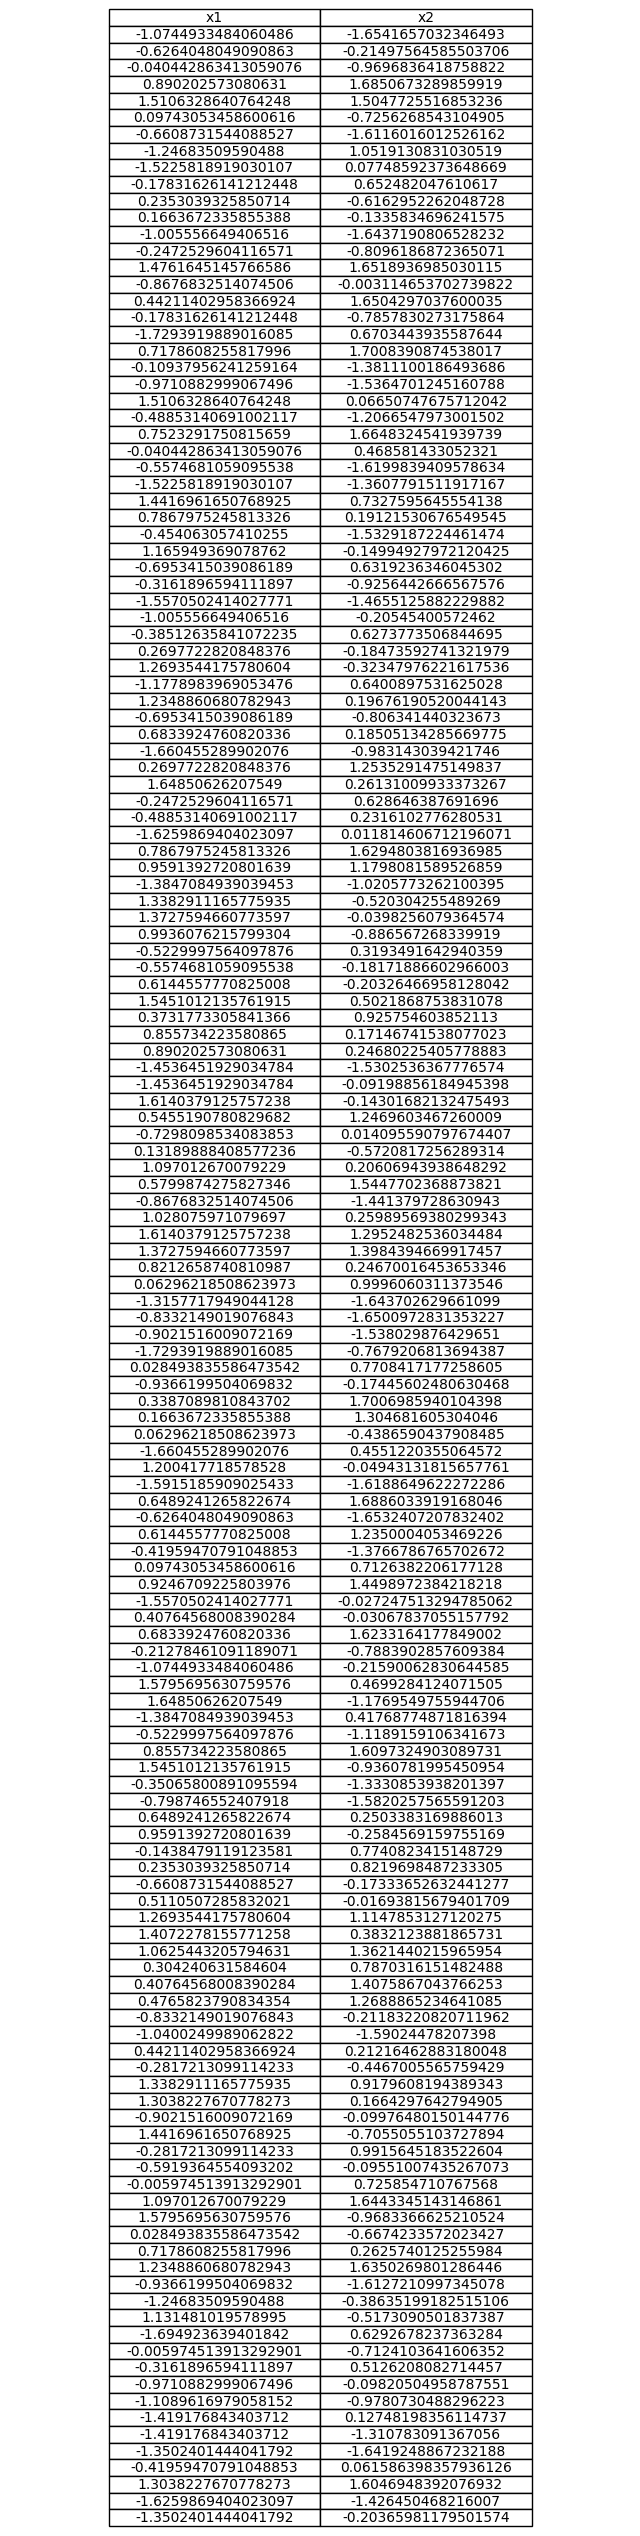

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))  
ax.axis('off')

# Create a table with labels 
table = ax.table(cellText=df_train_standardized.values, colLabels=df_train_standardized.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([i for i in range(len(df_train_standardized.columns))])

plt.show()

<h3>Test DataSet after Normalizing</h3>

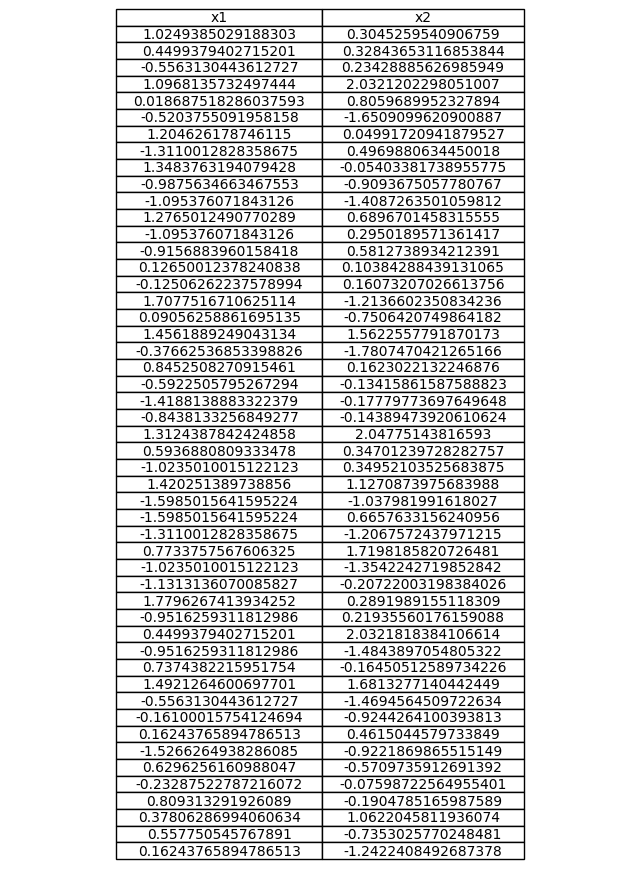

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))  
ax.axis('off')

# Create a table with labels 
table = ax.table(cellText=df_test_standardized.values, colLabels=df_test_standardized.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([i for i in range(len(df_test_standardized.columns))])

plt.show()

<h3>Seprate Validation DataSet of Size 50</h3>

In [8]:
# Get Validation Data Set
df_valid = df_train.sample(n=50)
v_x = df_valid.iloc[:, :2]
v_Y = df_valid.iloc[:, -1]

<h3>Validation DataSet (Seprated after normalization)</h3>

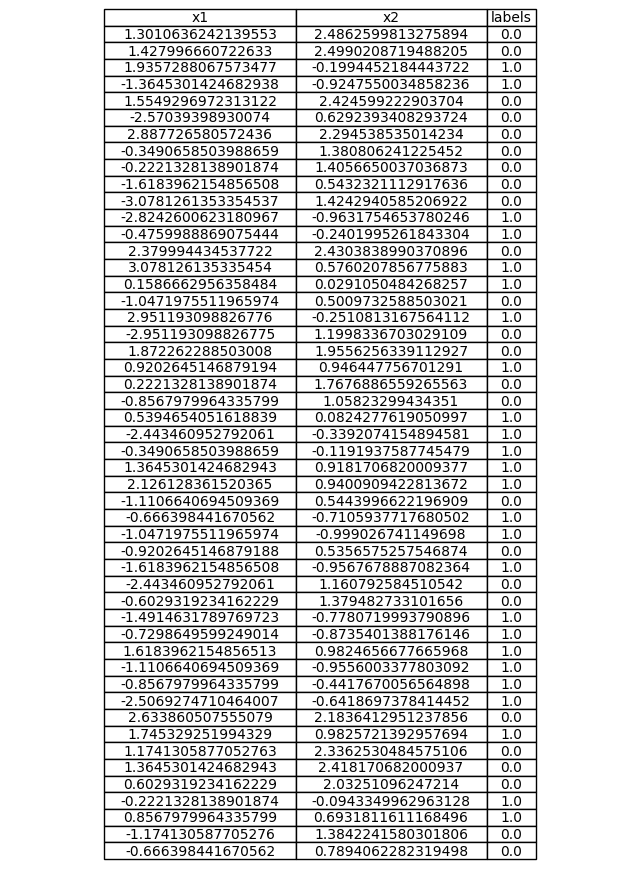

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))  
ax.axis('off')

# Create a table with labels 
table = ax.table(cellText=df_valid.values, colLabels=df_valid.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([i for i in range(len(df_valid.columns))])

plt.show()

<h3>Showing Train DataSet After Normalization</h3>

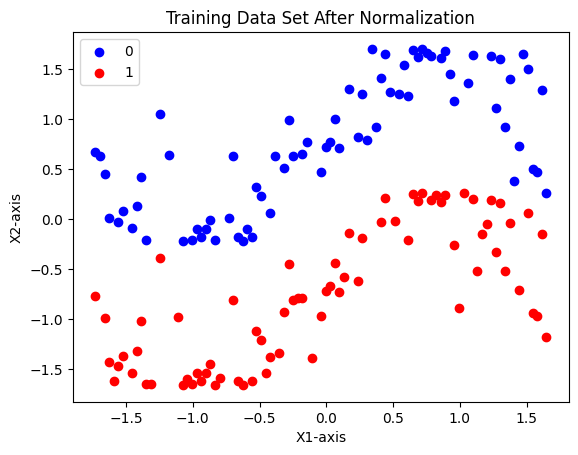

In [23]:
import copy
merged_train_stantandardized = copy.deepcopy(df_train_standardized)
merged_train_stantandardized['labels'] = copy.deepcopy(x_label)

# Blue for class zero and Red for class 1
class_colors = {0: 'blue', 1: 'red'}

# Create a scatter plot with colors based on the labels
for class_label, color in class_colors.items():
    plt.scatter(merged_train_stantandardized[merged_train_stantandardized['labels'] == class_label]['x1'], merged_train_stantandardized[merged_train_stantandardized['labels'] == class_label]['x2'], label=class_label, c=color)

plt.xlabel('X1-axis')
plt.ylabel('X2-axis')
plt.legend()
plt.title('Training Data Set After Normalization')

plt.show()


<h3>Showing Validation DataSet</h3>

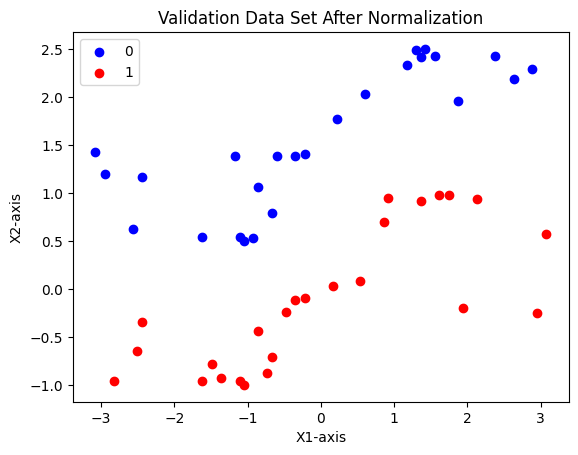

In [11]:
# Blue for class zero and Red for class 1
class_colors = {0: 'blue', 1: 'red'}

# Create a scatter plot with colors based on the labels
for class_label, color in class_colors.items():
    plt.scatter(df_valid[df_valid['labels'] == class_label]['x1'], df_valid[df_valid['labels'] == class_label]['x2'], label=class_label, c=color)

plt.xlabel('X1-axis')
plt.ylabel('X2-axis')
plt.legend()
plt.title('Validation Data Set After Normalization')

plt.show()

<h3>Perceptron</h3>
<ul>
    <li>Perform Perceptron algorithm using scikit-learn</li>
    <li>Draw a line between two classes</li>
</ul>

e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no1\env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


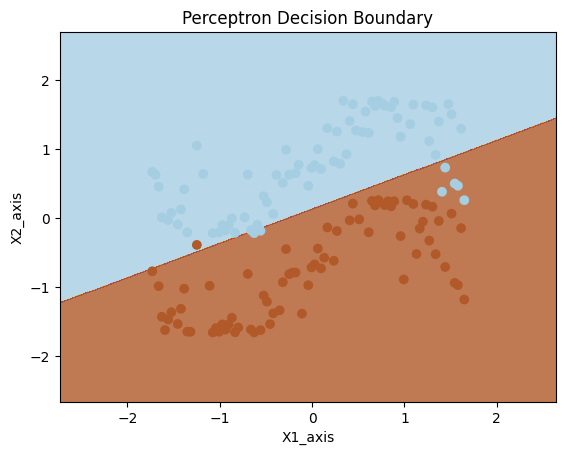

In [12]:
from sklearn.linear_model import Perceptron
import numpy as np

# Using sci-kit learn Perceptron Classifier
perceptron = Perceptron()
perceptron.fit(df_train_standardized, x_label)
# Define the range for the mesh grid
x_min, x_max = df_train_standardized.iloc[:, 0].min() - 1, df_train_standardized.iloc[:, 0].max() + 1
y_min, y_max = df_train_standardized.iloc[:, 1].min() - 1, df_train_standardized.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# Predict the class labels
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Visuallize
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(df_train_standardized.iloc[:, 0], df_train_standardized.iloc[:, 1], c=x_label, cmap=plt.cm.Paired)
plt.xlabel('X1_axis')
plt.ylabel('X2_axis')
plt.title('Perceptron Decision Boundary')
plt.show()

<h3>Accuracy</h3>
<ul>
    <li>Accuracy on Training DataSet</li>
    <li>Accuracy on Validation DataSet</li>
</ul>

In [13]:
from sklearn.metrics import accuracy_score

# Predicts the labels of training and validation dataset
train_pred = perceptron.predict(df_train_standardized)
validation_pred = perceptron.predict(v_x)
# Calculate Accuracy
train_acc = accuracy_score(x_label, train_pred)
validation_acc = accuracy_score(v_Y, validation_pred)

# Results 
print("Accuracy on Train Set : ")
print(train_acc)
print("Accuracy on Validation Set : ")
print(validation_acc)

Accuracy on Train Set : 
0.9466666666666667
Accuracy on Validation Set : 
0.86


<h3>Draw the Polynomial Feature Selection</h3>
<ul>
    <li>Polynomial of degree 2</li>
</ul>

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)
X_train_poly = poly2.fit_transform(df_train_standardized)
v_x_poly = poly2.transform(v_x)

perceptron_poly2 = Perceptron()
perceptron_poly2.fit(X_train_poly, x_label)

valid_acc = perceptron_poly2.score(v_x_poly, v_Y)
print("Accuracy on Validation Set : ")
print(valid_acc)
train_acc = perceptron_poly2.score(X_train_poly, x_label)
print("Accuracy on Training Set : ")
print(train_acc)

X_pred_poly2 = perceptron_poly2.predict(X_train_poly)
misclassified_indices = np.where(x_label != X_pred_poly2)[0]
print("Mis Classified Indices : ")
print(misclassified_indices)
print("Mis Classified Data Size : ")
print(misclassified_indices.shape)

Accuracy on Validation Set : 
0.76
Accuracy on Training Set : 
0.9133333333333333
Mis Classified Indices : 
[ 29  40  42  61  68  71  74  79 107 121 124 133 136]
Mis Classified Data Size : 
(13,)


<h3>Draw the Polynomial Feature Selection</h3>
<ul>
    <li>Polynomial of degree 3</li>
</ul>

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly3 = PolynomialFeatures(degree=3)
X_train_poly = poly3.fit_transform(df_train_standardized)
v_x_poly = poly3.transform(v_x)

perceptron_poly3 = Perceptron()
perceptron_poly3.fit(X_train_poly, x_label)

valid_acc = perceptron_poly3.score(v_x_poly, v_Y)
print("Accuracy on Validation Set : ")
print(valid_acc)
train_acc = perceptron_poly3.score(X_train_poly, x_label)
print("Accuracy on Training Set : ")
print(train_acc)

X_pred_poly3 = perceptron_poly3.predict(X_train_poly)
print(X_pred_poly3.shape)
misclassified_indices = np.where(x_label != X_pred_poly3)[0]
print("Mis Classified Indices : ")
print(misclassified_indices)
print("Mis Classified Data Size : ")
print(misclassified_indices.shape)

Accuracy on Validation Set : 
0.86
Accuracy on Training Set : 
1.0
(150,)
Mis Classified Indices : 
[]
Mis Classified Data Size : 
(0,)


<h3>Draw the Polynomial Feature Selection</h3>
<ul>
    <li>Polynomial of degree 5</li>
</ul>

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly5 = PolynomialFeatures(degree=5)
X_train_poly = poly5.fit_transform(df_train_standardized)
v_x_poly = poly5.transform(v_x)

perceptron_poly5 = Perceptron()
perceptron_poly5.fit(X_train_poly, x_label)

valid_acc = perceptron_poly5.score(v_x_poly, v_Y)
print("Accuracy on Validation Set : ")
print(valid_acc)
train_acc = perceptron_poly5.score(X_train_poly, x_label)
print("Accuracy on Training Set : ")
print(train_acc)

X_pred_poly5 = perceptron_poly5.predict(X_train_poly)
print(X_pred_poly5.shape)
misclassified_indices = np.where(x_label != X_pred_poly5)[0]
print("Mis Classified Indices : ")
print(misclassified_indices)
print("Mis Classified Data Size : ")
print(misclassified_indices.shape)

Accuracy on Validation Set : 
0.86
Accuracy on Training Set : 
1.0
(150,)
Mis Classified Indices : 
[]
Mis Classified Data Size : 
(0,)


<h3>Draw the Polynomial Feature Selection</h3>
<ul>
    <li>Polynomial of degree 10</li>
</ul>

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly10 = PolynomialFeatures(degree=10)
X_train_poly = poly10.fit_transform(df_train_standardized)
v_x_poly = poly10.transform(v_x)

perceptron_poly10 = Perceptron()
perceptron_poly10.fit(X_train_poly, x_label)

valid_acc = perceptron_poly10.score(v_x_poly, v_Y)
print("Accuracy on Validation Set : ")
print(valid_acc)
train_acc = perceptron_poly10.score(X_train_poly, x_label)
print("Accuracy on Training Set : ")
print(train_acc)

X_pred_poly10 = perceptron_poly10.predict(X_train_poly)
print(X_pred_poly10.shape)
misclassified_indices = np.where(x_label != X_pred_poly10)[0]
print("Mis Classified Indices : ")
print(misclassified_indices)
print("Mis Classified Data Size : ")
print(misclassified_indices.shape)

Accuracy on Validation Set : 
0.74
Accuracy on Training Set : 
1.0
(150,)
Mis Classified Indices : 
[]
Mis Classified Data Size : 
(0,)


<h3>Selected the Best Model</h3>
<ul>
    <li>Get the accuracy on test dataset</li>
</ul>

Simple Perceptron (Linear)

In [18]:
test_pred = perceptron.predict(df_test)

test_acc = accuracy_score(df_pred, test_pred)
print(test_acc)

0.42


Polynomial Perceptron with degree of 2

In [19]:
x_test_poly = poly2.transform(df_test_standardized)
test_pred = perceptron_poly2.predict(x_test_poly)

test_acc = accuracy_score(df_pred, test_pred)
print(test_acc)

0.38


Polynomial Perceptron with degree of 3

In [20]:
x_test_poly = poly3.transform(df_test_standardized)
test_pred = perceptron_poly3.predict(x_test_poly)

test_acc = accuracy_score(df_pred, test_pred)
print(test_acc)

0.38


Polynomial Perceptron with degree of 5

In [21]:
x_test_poly = poly5.transform(df_test_standardized)
test_pred = perceptron_poly5.predict(x_test_poly)

test_acc = accuracy_score(df_pred, test_pred)
print(test_acc)

0.4


Polynomial Perceptron with degree of 10

In [22]:
x_test_poly = poly10.transform(df_test_standardized)
test_pred = perceptron_poly10.predict(x_test_poly)

test_acc = accuracy_score(df_pred, test_pred)
print(test_acc)

0.36
